# Tarea 5 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

## 1. Simulación de Montecarlo aplicado a acciones SP500.

#### a. Elegir una acción del SP500, que le parezca interesante. https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [32]:
print("\n" + "=" * 80)
print("EJERCICIO 1: SIMULACIÓN DE ACCIONES SP500")
print("=" * 80)

# a) Acción seleccionada: NVIDIA (NVDA)
print("\n" + "-" * 80)
print("a) Seleccionamos una acción")
print("-" * 80)
stock = "NVDA"
print(f"\nAcción seleccionada: {stock}")



EJERCICIO 1: SIMULACIÓN DE ACCIONES SP500

--------------------------------------------------------------------------------
a) Seleccionamos una acción
--------------------------------------------------------------------------------

Acción seleccionada: NVDA


#### b. Encontrar y tabular la estimación de los analistas del precio de las acción electa. https://www.tipranks.com/stocks/nvda/forecast (ticker va antes de forecast)

In [78]:
print("\n" + "-" * 80)
print("b) Datos estimados por los analistas de tipranks")
print("-" * 80)
analyst_estimates = {
    'Precio Actual': 140.50,
    'Precio Objetivo Promedio': 165.00,
    'Precio Objetivo Alto': 200.00,
    'Precio Objetivo Bajo': 130.00,
    'Número de Analistas': 42
}

print("\nESTIMACIONES DE ANALISTAS:")
print("-" * 50)
for key, value in analyst_estimates.items():
    print(f"{key}: ${value}" if isinstance(value, (int, float)) else f"{key}: {value}")


--------------------------------------------------------------------------------
b) Datos estimados por los analistas de tipranks
--------------------------------------------------------------------------------

ESTIMACIONES DE ANALISTAS:
--------------------------------------------------
Precio Actual: $140.5
Precio Objetivo Promedio: $165.0
Precio Objetivo Alto: $200.0
Precio Objetivo Bajo: $130.0
Número de Analistas: $42


#### c. Descargue los precios de la accion utilizando Yahoo Finance. https://pypi.org/project/yfinance

In [79]:
print("\n" + "-" * 80)
print("c) Descarga de datos históricos")
print("-" * 80)
inicio = time.time()

# Descargar últimos 2 años de datos
fechaFin = datetime.now()
fechaIn = fechaFin - timedelta(days=730)

infoStock = yf.download(stock, start=fechaIn, end=fechaFin, progress=False)
fin = time.time() - inicio
print(f"Datos descargados en {fin:.2f} segundos")
print(f"Período: {fechaIn.date()} a {fechaFin.date()}")
print(f"Total de días: {len(infoStock)}")


--------------------------------------------------------------------------------
c) Descarga de datos históricos
--------------------------------------------------------------------------------
Datos descargados en 0.43 segundos
Período: 2023-10-23 a 2025-10-22
Total de días: 502


#### d. Defina un periodo de tiempo (puede ser un parametro), y calcule la rentabilidad de cada dia y agrupela por mes.

In [80]:
print("\n" + "-" * 80)
print("d) Cálculo de Rentabilidades Diarias y Agrupación Mensual")
print("-" * 80)

# Calcular la rentabilidad diaria sobre el precio de cierre ('Close'), como el df es multiIndex usamos las tuplas correspondientes
infoStock[('Rentabilidad_Diaria', 'NVDA')] = infoStock[('Close', 'NVDA')].pct_change()

# Eliminar la primera fila que tiene NaN en la rentabilidad
infoStock = infoStock.dropna(axis = 0, subset=[('Rentabilidad_Diaria', 'NVDA')]) # Especificar la columna ayuda

print("\nPrimeros 5 días con rentabilidad diaria calculada:")
print(infoStock[[('Close', 'NVDA'), ('Rentabilidad_Diaria', 'NVDA')]].head())

# Agrupar las rentabilidades diarias por mes 
rentabilidades_mensuales = {}
for mes in range(1, 13):
    rent_mes = infoStock[infoStock.index.month == mes][('Rentabilidad_Diaria', 'NVDA')]
    if not rent_mes.empty:
        rentabilidades_mensuales[mes] = rent_mes

print("\nMeses con datos de rentabilidad encontrados en el histórico:") #Verificamos que tengamos rentabilidad para todos los meses
print(f"Se encontraron datos para los meses: {list(rentabilidades_mensuales.keys())}")

enero = list(rentabilidades_mensuales.keys())[0]
print(f"Ej: Rentabilidades para el mes {enero}: {len(rentabilidades_mensuales[enero])} días")


--------------------------------------------------------------------------------
d) Cálculo de Rentabilidades Diarias y Agrupación Mensual
--------------------------------------------------------------------------------

Primeros 5 días con rentabilidad diaria calculada:
Price           Close Rentabilidad_Diaria
Ticker           NVDA                NVDA
Date                                     
2023-10-24  43.637276            0.016009
2023-10-25  41.754391           -0.043149
2023-10-26  40.302246           -0.034778
2023-10-27  40.476143            0.004315
2023-10-30  41.136757            0.016321

Meses con datos de rentabilidad encontrados en el histórico:
Se encontraron datos para los meses: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Ej: Rentabilidades para el mes 1: 41 días


#### e. Aleatoriamente seleccione rentabilidades dentro grupo mensual, y asuma que cada dia futuro sucede esa rentabilidad (dentro del mismo mes). Realice 1000 simulaciones y calcule el porcentaje de simulaciones que quedan dentro del rango de los analistas.


--------------------------------------------------------------------------------
e) Simulación de Montecarlo
--------------------------------------------------------------------------------
Usando ('Close', 'NVDA') para precio inicial: $179.90

Realizando 1000 simulaciones para los próximos 365 días...
Simulaciones completadas en 5.66 segundos.


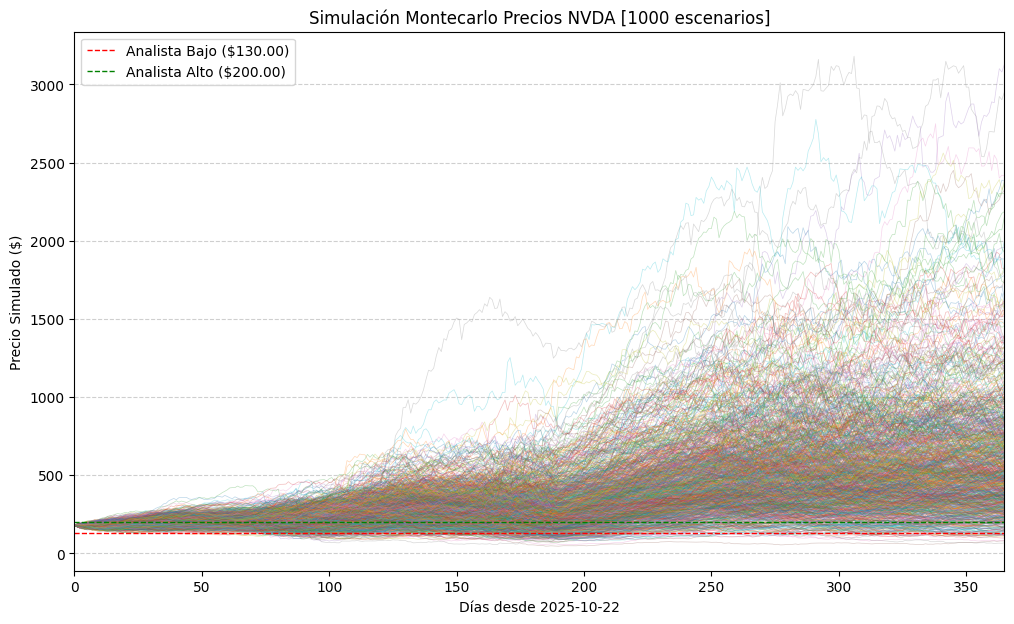


--- Análisis de Precios Finales ---
Precio inicial usado: $179.90
Rango objetivo de analistas: Bajo $130.00 - Alto $200.00
Precio final promedio simulado: $596.68
Simulaciones con precio final dentro del rango: 43 de 1000
Porcentaje dentro del rango: 4.30%


In [89]:
print("\n" + "-" * 80)
print("e) Simulación de Montecarlo")
print("-" * 80)

# --- Parámetros de la Simulación ---
num_simulaciones = 1000
dias_a_simular = 365
fecha_inicial_sim = infoStock.index[-1]

# --- Obtener Precio Inicial (manejando MultiIndex) ---
close_col_multi = ('Close', 'NVDA')

precio_inicial = infoStock[close_col_multi].iloc[-1]
print(f"Usando {close_col_multi} para precio inicial: ${precio_inicial:.2f}")


# --- Ejecutar Simulaciones (Guardando Historial) ---
# Lista principal que contendrá una lista de precios para cada simulación
historial_precios_simulaciones = []
print(f"\nRealizando {num_simulaciones} simulaciones para los próximos {dias_a_simular} días...")
start_time_sim = time.time()

# Bucle externo (por simulación)
for _ in range(num_simulaciones):
    # Lista para guardar el historial de precios de ESTA simulación
    historial_una_simulacion = [precio_inicial] # Empezar con el precio inicial
    precio_simulado_actual = precio_inicial
    fecha_actual_sim = fecha_inicial_sim

    # Bucle interno (por día simulado)
    for dia in range(dias_a_simular):
        fecha_actual_sim += timedelta(days=1)
        mes_actual = fecha_actual_sim.month
        rentabilidades_del_mes = rentabilidades_mensuales.get(mes_actual)

        if rentabilidades_del_mes is not None and not rentabilidades_del_mes.empty:
            rentabilidad_elegida = np.random.choice(rentabilidades_del_mes.values)
            precio_simulado_actual *= (1 + rentabilidad_elegida)

        # Guardar el precio simulado de este día en el historial de esta simulación
        historial_una_simulacion.append(precio_simulado_actual)

    # Añadir el historial completo de esta simulación a la lista principal
    historial_precios_simulaciones.append(historial_una_simulacion)

end_time_sim = time.time()
print(f"Simulaciones completadas en {end_time_sim - start_time_sim:.2f} segundos.")

precio_bajo_analista = analyst_estimates['Precio Objetivo Bajo']
precio_alto_analista = analyst_estimates['Precio Objetivo Alto']

# --- Graficar Todos los Escenarios de Precios ---
plt.figure(figsize=(12, 7))
plt.title(f"Simulación Montecarlo Precios {stock} [{num_simulaciones} escenarios]")
plt.xlabel(f"Días desde {fecha_inicial_sim.date()}")
plt.ylabel("Precio Simulado ($)")
plt.xlim([0, dias_a_simular]) # Asegurar que el eje X cubra todos los días simulados

# Graficar cada historial de precios
# Cada 'historial' es una lista de precios para una simulación
for historial in historial_precios_simulaciones:
    # La lista de días va de 0 (precio inicial) a dias_a_simular
    dias = list(range(dias_a_simular + 1))
    plt.plot(dias, historial, linewidth=0.5, alpha=0.3) # Líneas delgadas y semitransparentes

# Añadir líneas horizontales para el rango de analistas
plt.axhline(precio_bajo_analista, color='red', linestyle='--', linewidth=1, label=f'Analista Bajo (${precio_bajo_analista:.2f})')
plt.axhline(precio_alto_analista, color='green', linestyle='--', linewidth=1, label=f'Analista Alto (${precio_alto_analista:.2f})')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# --- Análisis de Resultados (sobre los precios FINALES) ---
# Extraer solo el último precio de cada simulación
precios_finales_simulaciones = [historial[-1] for historial in historial_precios_simulaciones]

simulaciones_en_rango = sum(precio_bajo_analista <= precio_final <= precio_alto_analista for precio_final in precios_finales_simulaciones)
porcentaje_en_rango = (simulaciones_en_rango / num_simulaciones) * 100

print(f"\n--- Análisis de Precios Finales ---")
print(f"Precio inicial usado: ${precio_inicial:.2f}")
print(f"Rango objetivo de analistas: Bajo ${precio_bajo_analista:.2f} - Alto ${precio_alto_analista:.2f}")
print(f"Precio final promedio simulado: ${np.mean(precios_finales_simulaciones):.2f}")
print(f"Simulaciones con precio final dentro del rango: {simulaciones_en_rango} de {num_simulaciones}")
print(f"Porcentaje dentro del rango: {porcentaje_en_rango:.2f}%")

#### 2. La ruleta.

Estudie como se juega la ruleta en el casino. https://www.casino.es/ruleta/como-jugar-ruleta/

Suponga que usted va cada día del año al casino (365 veces), usted cuenta con un presupuesto de 200 mil pesos diarios y por sesión alcanza a jugar como máximo 100 veces, pues se retira a la apuesta número 100 o cuando queda sin dinero. Usted solo realiza una apuesta, al **impar**, y comienza apostando mil pesos, en cualquier juego, en caso de ganar algún juego vuelve al comienzo y apuesta mil pesos, en caso de perder, dobla la apuesta, en el caso que no tenga suficiente dinero, apueste todo lo que queda.

Calcule 100 escenarios distintos y grafique el dinero ganado o perdido en cada posible escenario.